Calcular mediante una reg lineal las ventas de ticket de una pelicula

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('seaborn-dark')

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
peliculas = pd.read_csv('datasets/movies.csv')

In [3]:
peliculas.head()

,franquicia,presupuesto,genero,pagina_web,imdb_id,lenguaje,popularidad,productores,pais,fecha_estreno,ventas,duracion,estado,titulo,puntuacion,n_votos
0,Father of the Bride Collection,NaN,Comedy,NaN,tt0113041,en,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0
1,NaN,NaN,Drama,NaN,tt0112749,en,0.894647,Miramax,South Africa,1995-12-15,676525.0,106.0,Released,"Cry, the Beloved Country",6.7,13.0
2,Friday Collection,3500000.0,Comedy,http://www.newline.com/properties/friday.html,tt0113118,en,14.569650,New Line Cinema,United States of America,1995-04-26,28215918.0,91.0,Released,Friday,7.0,513.0
3,NaN,NaN,Comedy,NaN,tt0115697,en,8.963037,Paramount Pictures,United States of America,1996-02-01,32.0,87.0,Released,Black Sheep,6.0,124.0
4,NaN,12000000.0,Comedy,NaN,tt0116483,en,9.592265,Universal Pictures,United States of America,1996-02-16,41205099.0,92.0,Released,Happy Gilmore,6.5,767.0


In [4]:
peliculas.shape

(1349, 16)

In [5]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   franquicia     196 non-null    object 
 1   presupuesto    758 non-null    float64
 2   genero         1298 non-null   object 
 3   pagina_web     382 non-null    object 
 4   imdb_id        1349 non-null   object 
 5   lenguaje       1349 non-null   object 
 6   popularidad    1349 non-null   float64
 7   productores    1137 non-null   object 
 8   pais           1250 non-null   object 
 9   fecha_estreno  1348 non-null   object 
 10  ventas         1208 non-null   float64
 11  duracion       1341 non-null   float64
 12  estado         1348 non-null   object 
 13  titulo         1349 non-null   object 
 14  puntuacion     1349 non-null   float64
 15  n_votos        1349 non-null   float64
dtypes: float64(6), object(10)
memory usage: 168.8+ KB


- seleccionar como columnas independientes solo las numericas, y los valores NaN llenarlos con 0
- tips: de numpy se puede utilizar se puede utilizar 'select_dtypes' y 'fillna(0)'

In [6]:
df = peliculas.select_dtypes(exclude=['object'])
# select_dtypes(np.number).fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   presupuesto  758 non-null    float64
 1   popularidad  1349 non-null   float64
 2   ventas       1208 non-null   float64
 3   duracion     1341 non-null   float64
 4   puntuacion   1349 non-null   float64
 5   n_votos      1349 non-null   float64
dtypes: float64(6)
memory usage: 63.4 KB


In [8]:
df.isnull().sum()

presupuesto    591
popularidad      0
ventas         141
duracion         8
puntuacion       0
n_votos          0
dtype: int64

In [9]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   presupuesto  1349 non-null   float64
 1   popularidad  1349 non-null   float64
 2   ventas       1349 non-null   float64
 3   duracion     1349 non-null   float64
 4   puntuacion   1349 non-null   float64
 5   n_votos      1349 non-null   float64
dtypes: float64(6)
memory usage: 63.4 KB


In [10]:
df

,presupuesto,popularidad,ventas,duracion,puntuacion,n_votos
0,0.0,8.387519,76578911.0,106.0,5.7,173.0
1,0.0,0.894647,676525.0,106.0,6.7,13.0
2,3500000.0,14.569650,28215918.0,91.0,7.0,513.0
3,0.0,8.963037,32.0,87.0,6.0,124.0
4,12000000.0,9.592265,41205099.0,92.0,6.5,767.0
...,...,...,...,...,...,...
1344,0.0,1.642247,0.0,86.0,3.0,25.0
1345,0.0,0.352816,0.0,11.0,5.5,2.0
1346,0.0,0.110588,0.0,86.0,5.7,3.0
1347,0.0,9.742082,0.0,90.0,5.7,62.0


In [11]:
modelo_ols = LinearRegression()
X = df[['presupuesto', 'popularidad', 'duracion', 'puntuacion', 'n_votos']]
y = df[['ventas']]

In [12]:
resultado_cv = []
for i in range (10, 100):
    cv_rmse = cross_val_score(estimator=modelo_ols, X=X, y=y, 
                             scoring='neg_root_mean_squared_error',
                             cv=i).mean()
    resultado_cv.append(cv_rmse)

<function matplotlib.pyplot.show(close=None, block=None)>

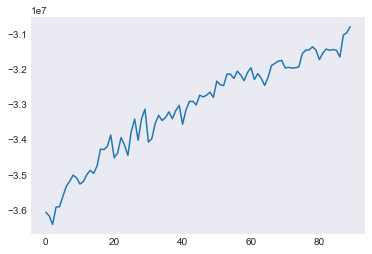

In [13]:
plt.plot(resultado_cv)
plt.show

In [14]:
score_error = {'mae':'neg_mean_absolute_error',
              'rmse':'neg_root_mean_squared_error',
              'mse':'neg_mean_squared_error'}
resultado_cvalidate = cross_validate(estimator=modelo_ols,
                                    X=X,
                                    y=y,
                                    scoring=score_error, 
                                    cv=50)

In [15]:
pd.DataFrame(resultado_cvalidate).mean()

fit_time      2.832427e-03
score_time    4.228630e-03
test_mae     -1.968964e+07
test_rmse    -3.356346e+07
test_mse     -1.525805e+15
dtype: float64

### Predecir valores de ventas

In [16]:
variable_objetivo = "ventas"
variables_independientes = df.drop(columns=variable_objetivo).columns
variables_independientes

Index(['presupuesto', 'popularidad', 'duracion', 'puntuacion', 'n_votos'], dtype='object')

In [17]:
X_train,X_test,y_train,y_test = train_test_split(df[variables_independientes],
                                                df[variable_objetivo],
                                                test_size = 0.3, random_state=10)

In [18]:
X_train.shape

(944, 5)

In [19]:
modelo = LinearRegression()
predicciones = modelo.fit(X=X_train,y=y_train).predict(X_test) # pipeline
predicciones.shape

(405,)

In [20]:
for y,y_pred in list(zip(y_test,predicciones)):
    print("Real: {:0.3f} Estimado: {:0.3f}".format(y,y_pred))

Real: 61255921.000 Estimado: 50267563.647
Real: 93000.000 Estimado: 7106712.321
Real: 11620000.000 Estimado: 11768118.703
Real: 6000000.000 Estimado: 12458142.085
Real: 39267515.000 Estimado: 39108165.968
Real: 610792.000 Estimado: 26681138.426
Real: 355237933.000 Estimado: 173045638.844
Real: 3777141.000 Estimado: 3050715.926
Real: 25956113.000 Estimado: 53927633.844
Real: 0.000 Estimado: 4967826.469
Real: 206678440.000 Estimado: 102503404.604
Real: 68296293.000 Estimado: 50757238.080
Real: 0.000 Estimado: 1559802.495
Real: 34742066.000 Estimado: 47940535.203
Real: 22212223.000 Estimado: 4770969.936
Real: 3661757.000 Estimado: 13388647.496
Real: 216197492.000 Estimado: 132237649.885
Real: 88097.000 Estimado: 3773933.696
Real: 2900000.000 Estimado: 5446228.446
Real: 20240128.000 Estimado: 5346522.808
Real: 157920733.000 Estimado: 93019508.205
Real: 62852.000 Estimado: 7587475.002
Real: 23507567.000 Estimado: 14665821.175
Real: 11000000.000 Estimado: 57958323.326
Real: 26121638.000 Esti